In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imageio import imread

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


png_paths = ['/Users/DanCassin/Downloads/4759_st1280_119 1.png',
            '/Users/DanCassin/Downloads/6430_st1280_119 1.png']

orig_csv_paths = ['/Users/DanCassin/Desktop/Biggie/evox_cars_rear_windows/4759_st1280_119_window.csv',
            '/Users/DanCassin/Desktop/Biggie/evox_cars_rear_windows/6430_st1280_119_window.csv']

In [32]:
outline1 = pd.read_csv(orig_csv_paths[0], header=None, usecols=[0,1], skiprows=1)
outline1_array = np.array(outline1)
outline1_array

outline2 = pd.read_csv(orig_csv_paths[1], header=None, usecols=[0,1], skiprows=1)
outline2_array = np.array(outline2)
outline2_array

array([[ 719.25 ,  996.25 ],
       [ 714.25 ,  833.75 ],
       [ 455.   ,  812.25 ],
       [ 371.25 ,  807.75 ],
       [ 233.   ,  816.5  ],
       [  35.5  ,  833.75 ],
       [  31.75 ,  990.   ],
       [  35.   ,  999.5  ],
       [ 104.375, 1021.25 ],
       [ 255.75 , 1033.   ],
       [ 490.375, 1032.375],
       [ 633.375, 1021.625]])

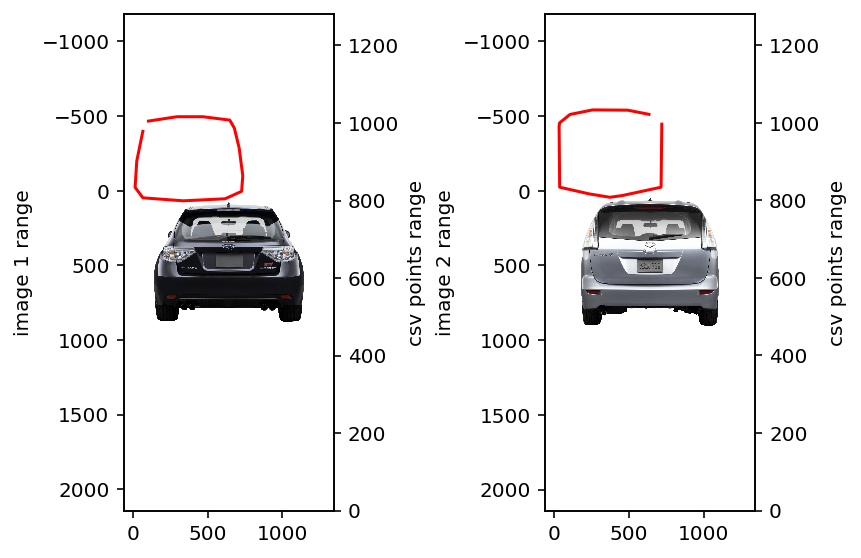

In [34]:
# Plotted on Different Axes Same Scale

image1 = imread(png_paths[0])
image2 = imread(png_paths[1])

fig, (ax1, ax3) = plt.subplots(1,2)

ax1.imshow(image1)
ax1.set(ylabel='image 1 range')

ax2 = ax1.twinx()
ax2.plot(outline1[0][:], outline1[1][:], color='r')
ax2.set_ylim(0,image1.shape[1])
ax2.set(ylabel='csv points range')

ax3.imshow(image2)
ax3.set(ylabel='image 2 range')

ax4 = ax3.twinx()
ax4.plot(outline2[0][:], outline2[1][:], color='r')
ax4.set_ylim(0,image2.shape[1])
ax4.set(ylabel='csv points range')
plt.tight_layout();


In [35]:
image1.shape

(960, 1281, 4)

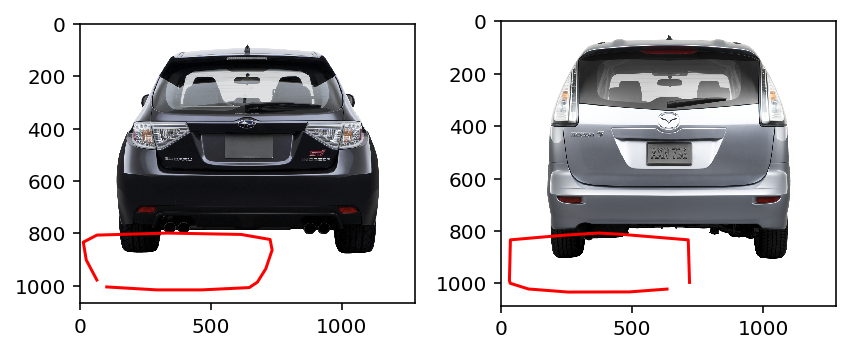

In [246]:
# Plotted on Same Axis

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(image1)
ax1.plot(outline1[0][:],outline1[1][:], color='r')

ax2.imshow(image2)
ax2.plot(outline2[0][:], outline2[1][:], color='r')
plt.tight_layout();


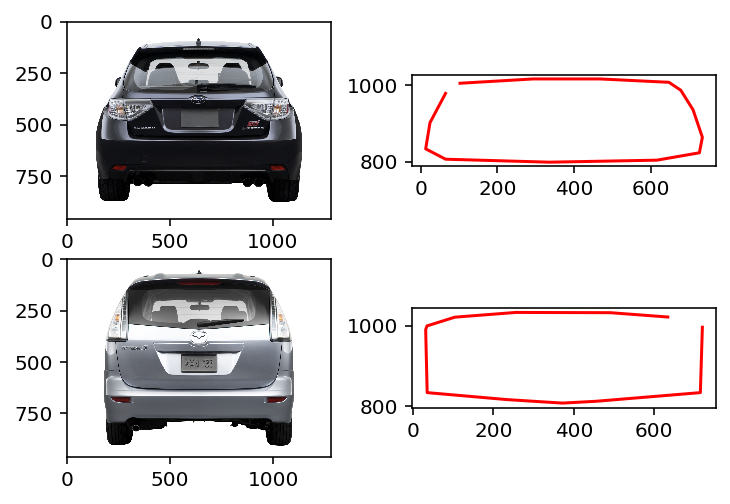

In [243]:
# plotted next to eachother

image = imread(png_paths[0])

fig, ((ax1, ax2),(ax3, ax4))= plt.subplots(2,2)

ax1.imshow(image1)

ax2.plot(outline1[0][:], outline1[1][:], color='r') #removed outlier point
ax2.axis('scaled');
# outline seems to be out of the range of the car

ax3.imshow(image2)

ax4.plot(outline2[0][:], outline2[1][:], color='r') #removed outlier point
ax4.axis('scaled');
# outline seems to be out of the range of the car

(960, 1281, 4)
(960, 1280, 4)


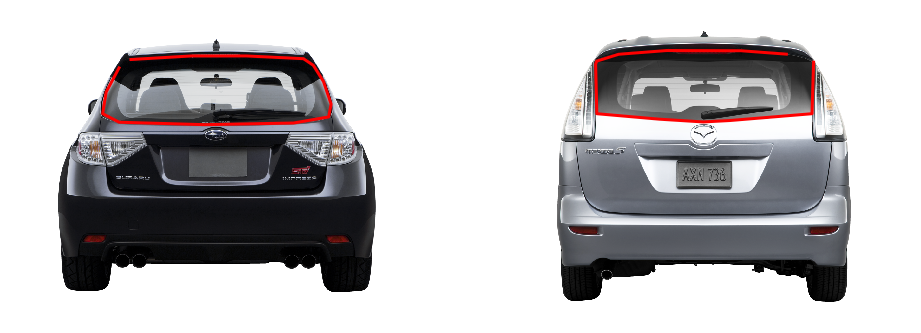

In [180]:
# 9/27 Files from Jason

ROOT = '/Users/DanCassin/Downloads/'

new_csv_paths = ['4759_st1280_119_window.csv','6430_st1280_119_window.csv']
png_paths = ['4759_st1280_119 1.png','6430_st1280_119 1.png']

outline1 = pd.read_csv(ROOT+new_csv_paths[0], header=None)
outline2 = pd.read_csv(ROOT+new_csv_paths[1], header=None)


image1 = imread(ROOT + png_paths[0])
image2 = imread(ROOT + png_paths[1])

print(image1.shape)
print(image2.shape)

fig = plt.figure(figsize=(8,16))

ax1 = fig.add_subplot(121)
ax1.axis('off')
ax1.imshow(image1)
ax1.plot(outline1[0][1:], -1*outline1[1][1:], color='r')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.imshow(image2)
ax2.plot(outline2[0][1:], -1*outline2[1][1:], color='r')
plt.show();

## Comparing new and old files

In [224]:
old_6430 = pd.read_csv(orig_csv_paths[1], header=None, usecols=[0,1], skiprows=1)

old_6430.rename(columns={
                0 : 'old_x',
                1 : 'old_y'}, 
                inplace=True)

new_6430 = pd.read_csv(ROOT + new_csv_paths[1], header=None, usecols=[0,1], skiprows=1)

new_6430.rename(columns={
                0 : 'new_x',
                1 : 'new_y'}, 
                inplace=True)


In [233]:
df = pd.concat([old_6430, new_6430], axis=1)

In [234]:
df['x_diff'] = df.old_x - df.new_x
df['y_diff'] = df.old_y - df.new_y

df
# The diffs seem very consistent

,old_x,old_y,new_x,new_y,x_diff,y_diff
0,719.250,996.250,984.250,-150.750,-265.0,1147.0
1,714.250,833.750,979.250,-313.250,-265.0,1147.0
2,455.000,812.250,720.000,-334.750,-265.0,1147.0
3,371.250,807.750,636.250,-339.250,-265.0,1147.0
4,233.000,816.500,498.000,-330.500,-265.0,1147.0
5,35.500,833.750,300.500,-313.250,-265.0,1147.0
6,31.750,990.000,296.750,-157.000,-265.0,1147.0
7,35.000,999.500,300.000,-147.500,-265.0,1147.0
8,104.375,1021.250,369.375,-125.750,-265.0,1147.0
9,255.750,1033.000,520.750,-114.000,-265.0,1147.0


In [230]:
old_4759 = pd.read_csv(orig_csv_paths[0], header=None, usecols=[0,1], skiprows=1)

old_4759.rename(columns={
                0 : 'old_x',
                1 : 'old_y'}, 
                inplace=True)

new_4759 = pd.read_csv(ROOT + new_csv_paths[0], header=None, usecols=[0,1], skiprows=1)

new_4759.rename(columns={
                0 : 'new_x',
                1 : 'new_y'}, 
                inplace=True)

In [236]:
df2 = pd.concat([old_4759, new_4759], axis=1)

In [237]:
df2['x_diff'] = df2.old_x - df2.new_x
df2['y_diff'] = df2.old_y - df2.new_y

df2
# Same diffs as the previous file

,old_x,old_y,new_x,new_y,x_diff,y_diff
0,102.50,1005.00,367.50,-142.00,-265.0,1147.0
1,293.50,1016.25,558.50,-130.75,-265.0,1147.0
2,466.50,1016.25,731.50,-130.75,-265.0,1147.0
3,647.00,1007.50,912.00,-139.50,-265.0,1147.0
4,678.00,986.75,943.00,-160.25,-265.0,1147.0
5,710.00,935.75,975.00,-211.25,-265.0,1147.0
6,734.25,864.25,999.25,-282.75,-265.0,1147.0
7,726.50,823.75,991.50,-323.25,-265.0,1147.0
8,615.75,804.50,880.75,-342.50,-265.0,1147.0
9,335.50,799.25,600.50,-347.75,-265.0,1147.0


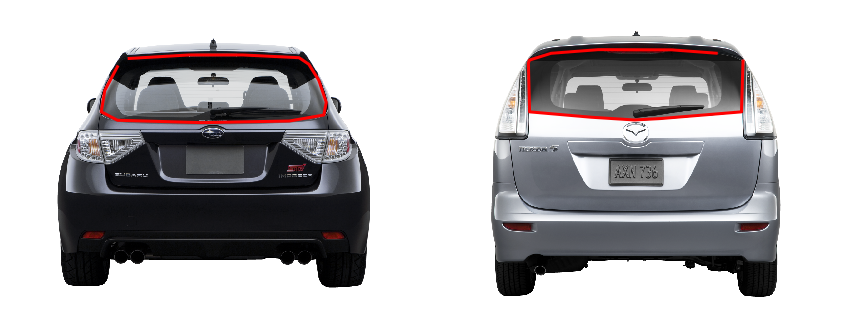

In [248]:
# Using the above constants of adding 265.0 to x and subtracting 1147 from y

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(image1)
ax1.plot(outline1[0][:]+265, -1*(outline1[1][:]-1147), color='r')
ax1.axis('off')

ax2.imshow(image2)
ax2.plot(outline2[0][:]+265, -1*(outline2[1][:]-1147), color='r')
ax2.axis('off')
plt.tight_layout();

## Transferring the above to the original csv and "  1.png" files

In [6]:
import glob

original_csvs_119 = sorted(glob.glob('/Users/DanCassin/Desktop/Biggie/evox_clip_paths/*.csv'))

In [9]:
random_csv1 = pd.read_csv(original_csvs_119[0], header=None)
random_img1 = imread('/Users/DanCassin/Desktop/Biggie/evox_cars_rear_windows/10259_st1280_119 1.png')

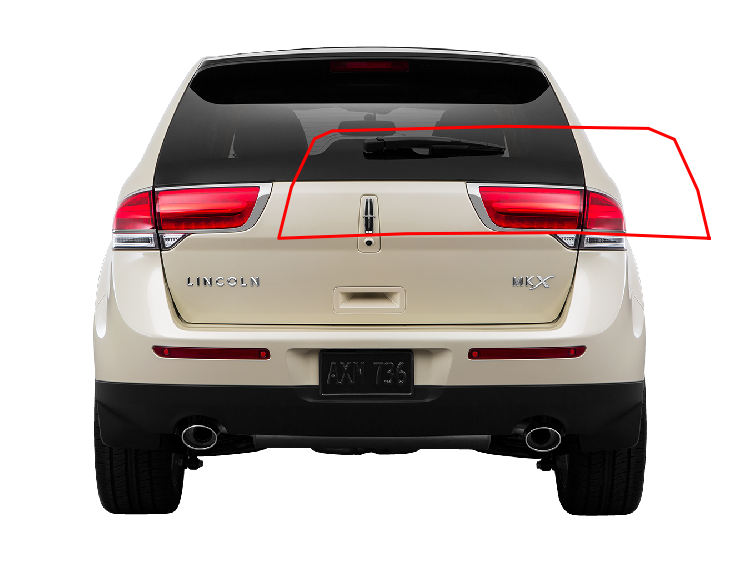

In [11]:
# Using the above constants of adding 265.0 to x and subtracting 1147 from y

fig, ax1 = plt.subplots(1)

ax1.imshow(random_img1)
ax1.plot(random_csv1[0][:], -1*(random_csv1[1][:]), color='r')
ax1.axis('off')

plt.tight_layout();

In [13]:
original_csvs_119[21]

'/Users/DanCassin/Desktop/Biggie/evox_clip_paths/10336_st1280_119_window.csv'

In [16]:
random_csv2 = pd.read_csv(original_csvs_119[21], header=None)
random_img2 = imread('/Users/DanCassin/Desktop/Biggie/evox_cars_rear_windows/10336_st1280_119 1.png')


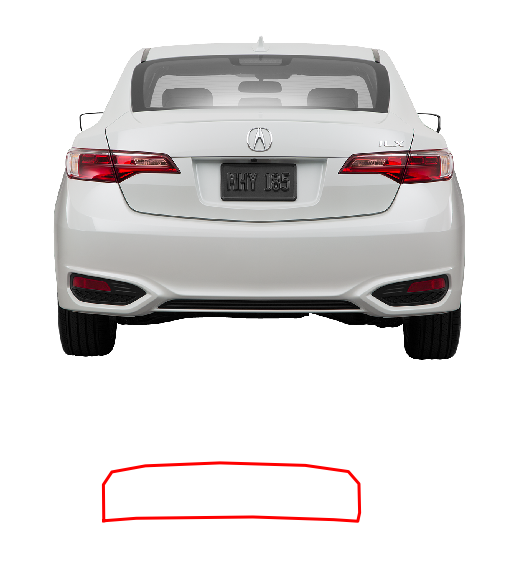

In [20]:
# Using the above constants of adding 265.0 to x and subtracting 1147 from y

fig, ax1 = plt.subplots(1)

ax1.imshow(random_img2)
ax1.plot(random_csv2[0][:]+256, -1*(random_csv2[1][:]-1147), color='r')
ax1.axis('off')

plt.tight_layout();

In [23]:
random_csv3 = pd.read_csv(original_csvs_119[75], header=None)
random_img3 = imread('/Users/DanCassin/Desktop/Biggie/evox_cars_rear_windows/11122_st1280_119 1.png')

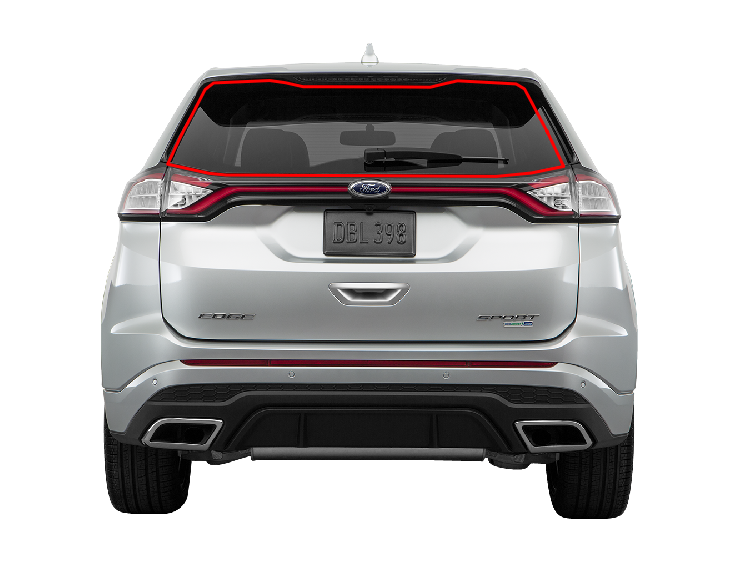

In [29]:
# Using the above constants of adding 265.0 to x and subtracting 1147 from y

fig, ax1 = plt.subplots(1)

ax1.imshow(random_img3)
ax1.plot(random_csv3[0][:]+256, -1*(random_csv3[1][:]+183), color='r')
ax1.axis('off')

plt.tight_layout();

In [36]:
random_img3.shape

(960, 1280, 4)